# Сборный Проект — 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

#### Загрузка данных

##### Откроем файл с данными и изучим общую информацию:

In [5]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

##### Выведем первые 5 строк и основную информацию о датафреймах:

In [7]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видно, в данных есть пропуски, и в некоторых столбцах требуется изменить тип данных. Так же требуется имена столбцов привести к нижнему регистру.

Переименуем столбцы:

In [11]:
games.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}, inplace=True)

Построим гистограммы для всех числовых столбцов датафрейма:

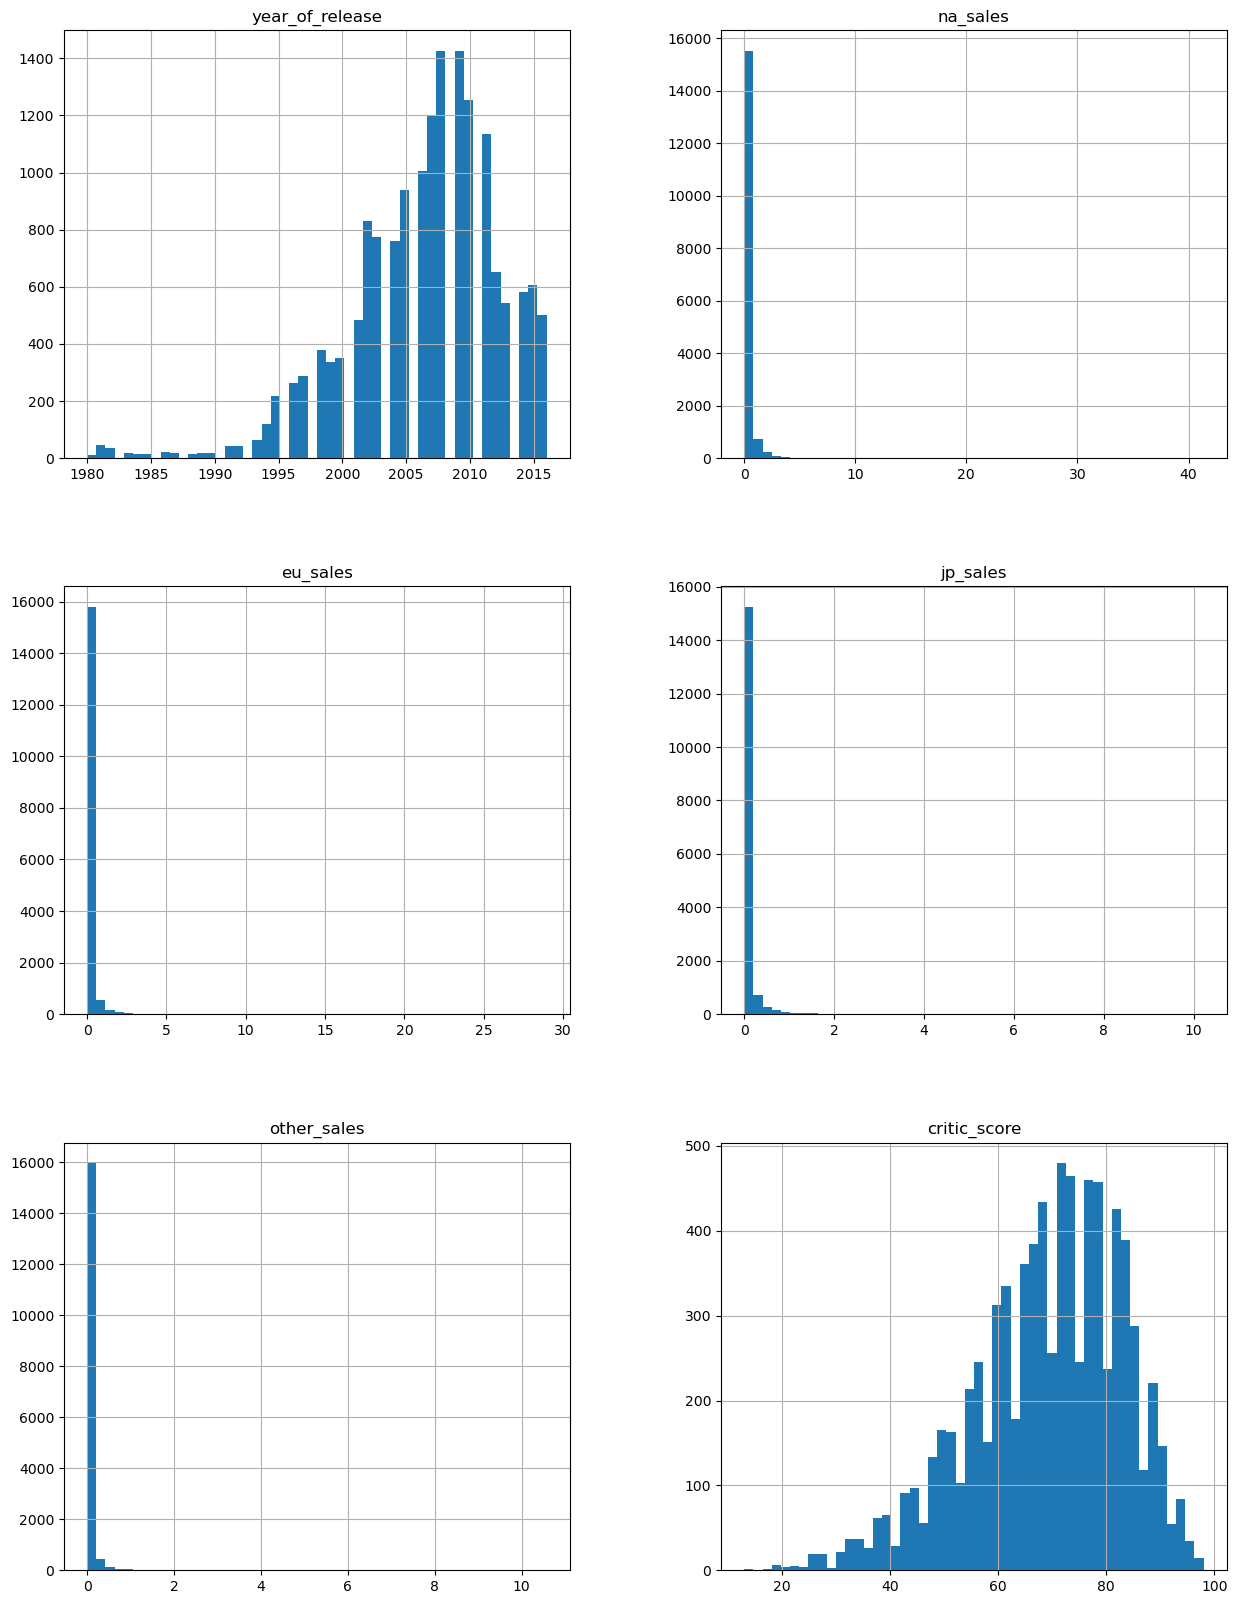

In [13]:
games.hist(figsize=(15, 20), bins=50)
plt.show()

**В данном пункте был загружен датафрейм и выведена основная информация о нем:**
- Переименованы столбцы
- Выведена общая информация о датафрейме
- Построены гистограммы для числовых столбцов

#### Предобработка данных

##### Преобразуем данные в правильные типы:

Изменим тип данных в столбце `year_of_release` на целочисленный, так как год выпуска может быть только целым числом:

In [18]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Посмотрим уникальные значения столбца `critic_score`:

In [20]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Тип данных на целочисленный в данном столбце заменим после заполнения пропусков.

Посмотрим уникальные значения столбца `user_score`:

In [23]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце видим значение `tbd`. To Be Determined, то есть "Будет определено", это значит, что у игры еще нет оценки, поэтому заменим данное значение на nan.

Изменим тип данных столбца `user_score` на число с плавающей точкой, так как в этом столбце в датафрейме есть дробные числа:

In [26]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

##### Обработка пропусков:

Посчитаем количество пропусков:

In [29]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [30]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Пропуски в столбцах `name`, `year_of_release`, `genre` занимают небольшую часть датафрейма (менее 2%), поэтому просто удалим их:

In [32]:
games.shape

(16715, 11)

In [33]:
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
games.shape

(16444, 11)

Код отработал верно, количество строк корректное.

Для определения природы пропусков в столбцах `critic_score` и `user_score` нужно понять природу этих пропусков для этого выведем матрицу корреляции пропущенных значений.

In [36]:
games[['critic_score', 'user_score']].isnull().corr()

,critic_score,user_score
critic_score,1.000000,0.799412
user_score,0.799412,1.000000


Мы видим высокую корреляцию между пропусками. То есть, если значение пропущенно в столбце `critic_score`, то оно с большой вероятностью будет пропущенно в столбце `user_score`. Таким образом, мы не можем сделать вывод о характере этих пропусков и предложить метод их заполнения.

Пропущенные значения в столбце `rating` могут быть обусловлены тем, что данная система используется в США и Канаде, и играм, выпущенным для других рынков, он может быть не присвоен. Поэтому заполним пропущенные значения в данном столбце `Unknown`. 

In [39]:
games['rating'] = games['rating'].fillna('Unknown')

Посмотрим пропуски в датафрейме после их обработки:

In [41]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.500000
user_score,54.600000


##### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [43]:
games['world_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Выведем первые 5 строк получившегося датафрейма:

In [45]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


Проверим датафрейм на наличие явных дубликатов:

In [47]:
games.duplicated().sum()

0

Явных дубликатов нет.

Основываясь на столбцах `'name', 'platform' и 'year_of_release'` проверим датафрейм на наличие неявных дубликатов:

In [50]:
games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Выведем эту строку:

In [52]:
games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


Выведем обе строки из датафрейма `games`:

In [54]:
games.loc[(games['name'] == 'Madden NFL 13') & (games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Мы видим неявный дубликат: строки эдентичны по всем столбцам, кроме продаж. Возможно, данный дубликат образовался при сборе данных из различных источников или в результате технической ошибки. Удалим этот дубликат.

In [56]:
games.shape

(16444, 12)

In [57]:
games = games.loc[~(games.duplicated(subset=['name', 'platform', 'year_of_release']))]
games.shape

(16443, 12)

In [58]:
games.loc[(games['name'] == 'Madden NFL 13') & (games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56


Код отработал верно, количество строк корректное.

**В данном пункте была произведена предобработка данных:**
- Преобразованы данные в правильные типы
- По возможности удалены и заполнены пропущенные значения в столбцах `name`, `year_of_release`, `genre` и `rating`
- Создан столбец `world_sales` с выручкой по всем регионам
- Обработаны неявные дубликаты.

#### Исследовательский анализ данных

##### Посмотрим, сколько игр выпускалось в разные годы

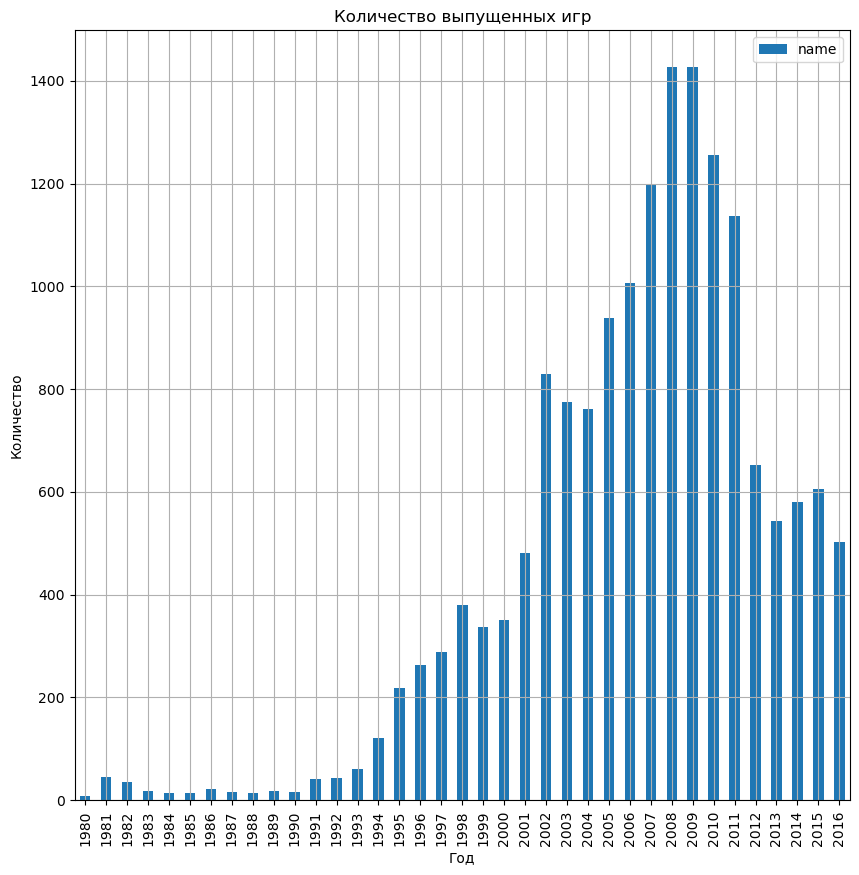

In [63]:
years_count = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
years_count.plot(kind='bar', grid=True, figsize=(10, 10))
plt.title('Количество выпущенных игр')
plt.xlabel("Год")
plt.ylabel("Количество")
plt.show()

На графике видно, что пик выпуска игр пришелся на 2002-2011 годы, затем произошло двукратное снижение количества выпускаемых игр и стабилизация в диапазоне 550-600 игр в год. До 1994 года игры практически не выпускались (менее 100 игр в год).

##### Посмотрим, как менялись продажи по платформам

Выберем платформы с наибольшими продажами:

In [67]:
platform_years_count = games.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by=('world_sales'), ascending=False)
platform_years_count.describe()

,world_sales
count,31.000000
mean,284.334194
std,343.953517
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


Выберем 5 самых продаваемых платформ:

In [69]:
platform_years_count = platform_years_count.head(5)
platform_years_count

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78


Построим график продаж по годам:

In [71]:
str_index=['PS2','DS','PS3','Wii','X360']
platform_years_count = pd.DataFrame()
for i in str_index:
    platform_years_count = pd.concat([platform_years_count, games.loc[games['platform'] == i]], ignore_index=True)
platform_years_count = platform_years_count.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum').fillna(0)

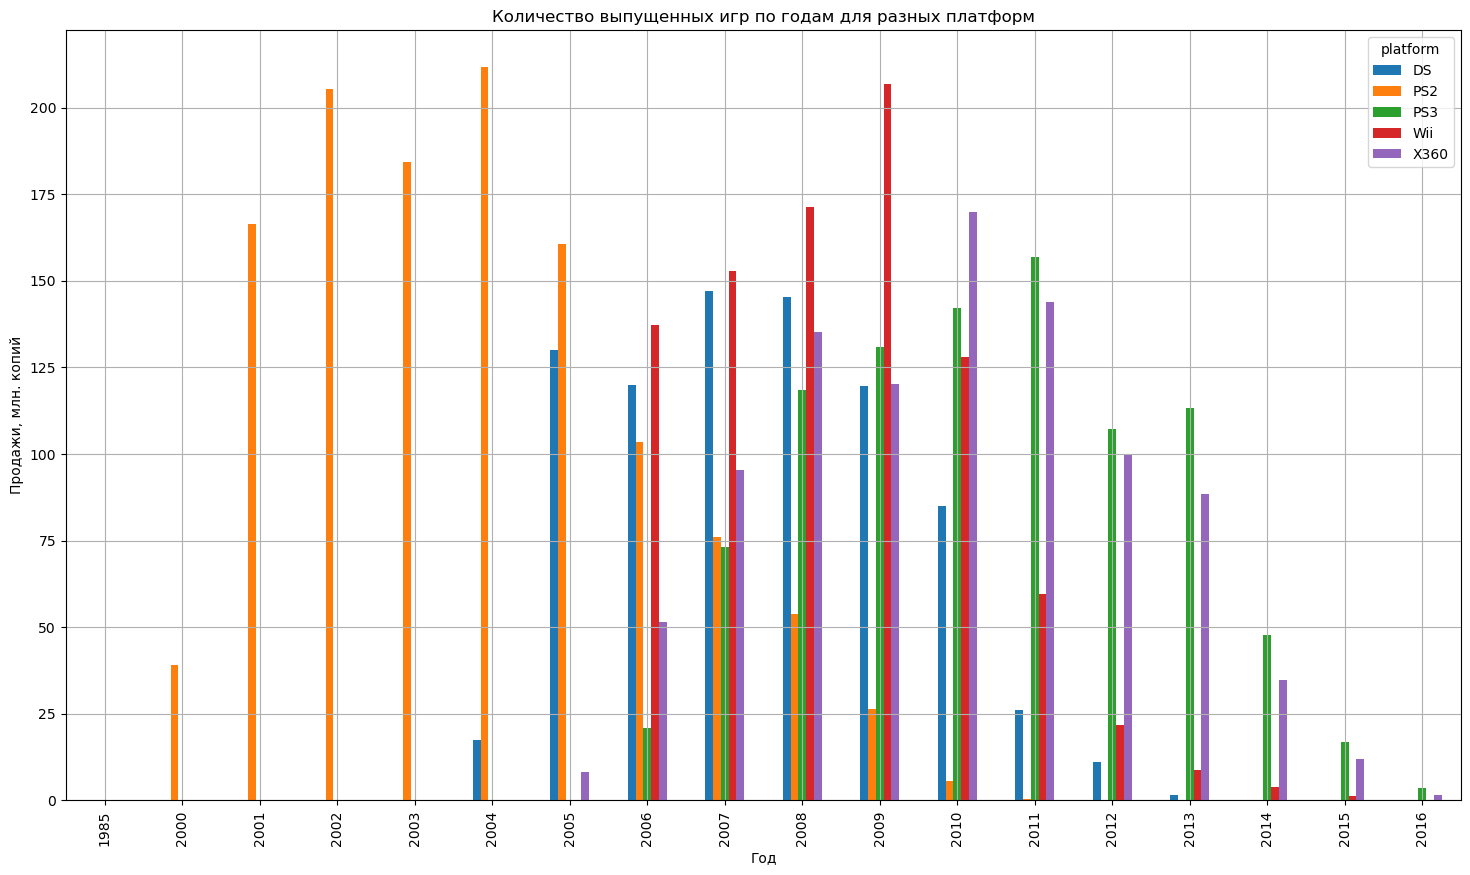

In [72]:
platform_years_count.plot(kind='bar', grid=True, figsize=(18, 10))
plt.title('Количество выпущенных игр по годам для разных платформ')
plt.xlabel("Год")
plt.ylabel("Продажи, млн. копий")
plt.show()

In [73]:
platform_years_count

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,0.00,0.00,0.00,0.00
2000,0.00,39.17,0.00,0.00,0.00
2001,0.00,166.43,0.00,0.00,0.00
2002,0.00,205.38,0.00,0.00,0.00
2003,0.00,184.31,0.00,0.00,0.00
2004,17.27,211.81,0.00,0.00,0.00
2005,130.14,160.66,0.00,0.00,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


Как видно и графика и таблицы, самые активные продажи на платформу приходятся в первые 5 лет после выхода платформы. В первый год продажи невысокие, что вероятно связано с тем, что платформа на рынке присутствует неполный год. Поэтому для выбора потенциально прибыльных платформ будем анализировать данные за последние 3 года. Жизненный цикл платформы составляем 6-7 лет. это видно на примере `PS2` и `PS3`: `PS2` вышла в 2000 году, а в 2006 году вышла `PS3`, и продажи игр на платформы прошлого поколения пошли вниз.

##### Выберем потенциально прибыльные платформы

Создадим датафрейм с продажами на 2014-2016 годы и изучим статистику продажи по платформам:

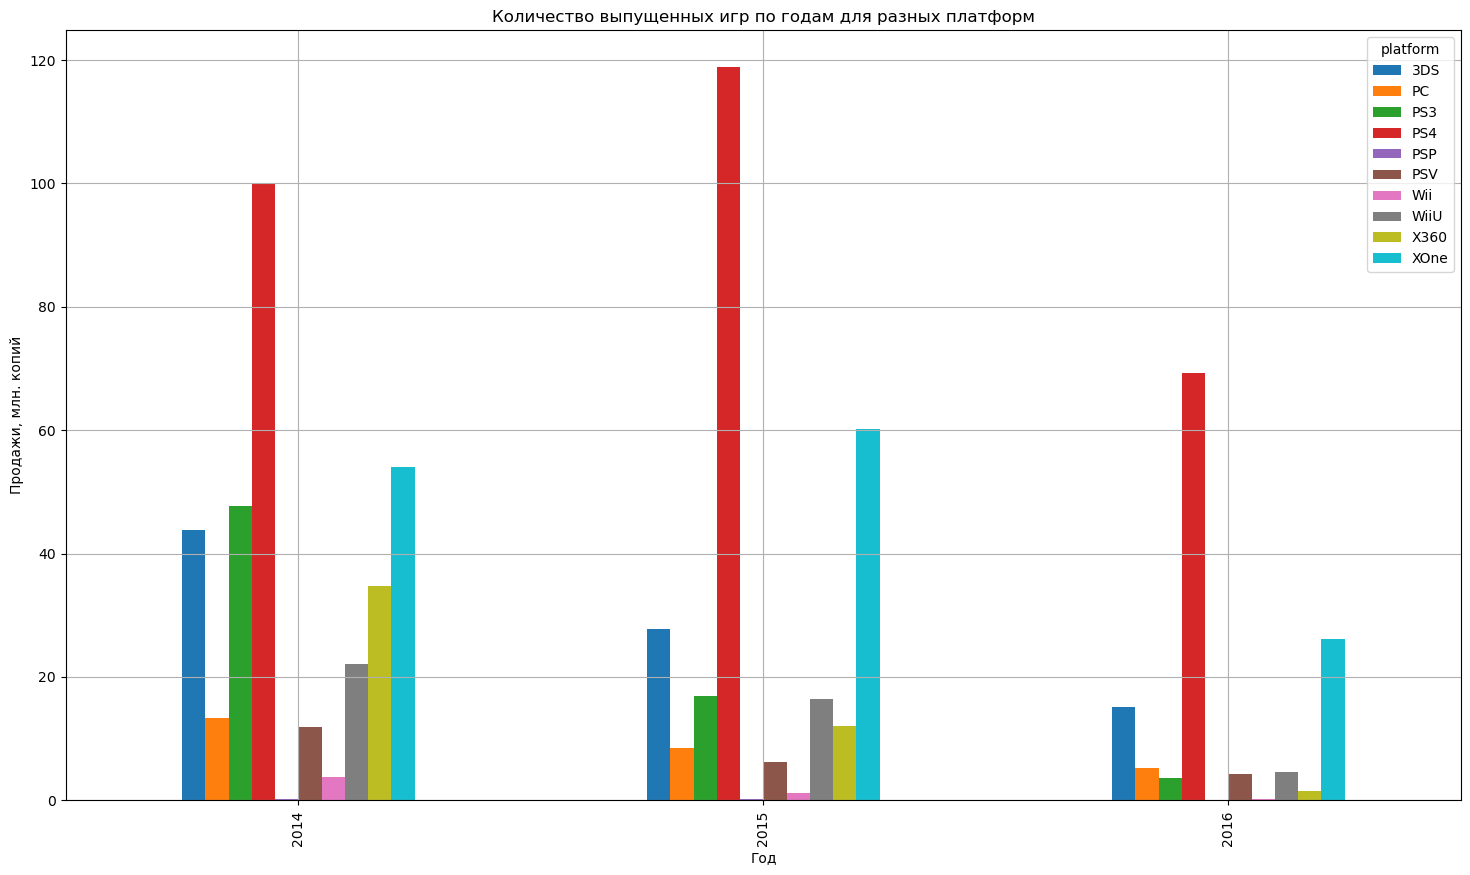

In [77]:
games_actual = games.loc[games['year_of_release'] >= 2014]
platform_years_actual_count = games_actual.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum').fillna(0)
platform_years_actual_count.plot(kind='bar', grid=True, figsize=(18, 10))
plt.title('Количество выпущенных игр по годам для разных платформ')
plt.xlabel("Год")
plt.ylabel("Продажи, млн. копий")
plt.show()

In [78]:
platform_years_actual_count

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Из графика видно, что наиболее перспективными платформами являются `PS4` и `XOne`. Продажи игр на эти платформы росли в 2015 году и сохранились на относительно высоком уровне на фоне общего снижения в 2016 году (складывается впечатление, что данные за 2016 год неполные).

##### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

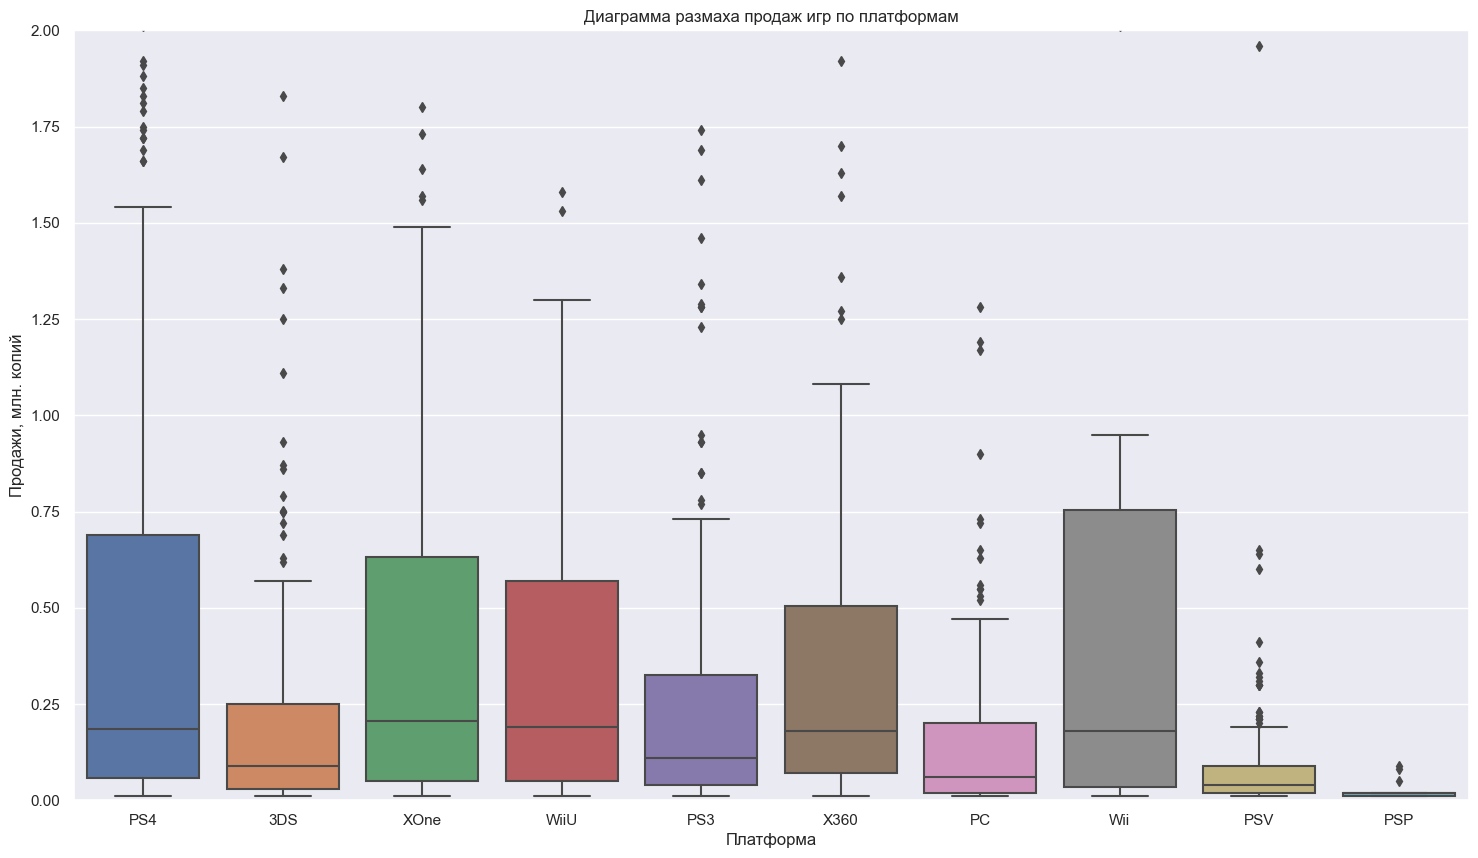

In [81]:
sns.set(rc={"figure.figsize":(18 , 10)})
sns.boxplot(data=games_actual, x="platform", y="world_sales")
plt.ylim(0, 2)
plt.title('Диаграмма размаха продаж игр по платформам')
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. копий")
plt.show()

На диаграммах очень неравномерное распределение: подавляющее большинство игр продается в диапазоне до 1 млн. копий и присутствуют единичные выбросы с продажами больше 2 млн. копий. Продажи по самым перспективным платформам `PS4` и `XOne` распределены похожим образом, `PS4` лидирует с небольшим отрывом. Так же можно отметить платформу `Wii`, на которую выходит не так много игр, но они неплохо продаются.

##### Посмотрим, как влияют на продажи внутри `PS4` отзывы пользователей и критиков

Создадим датафрейм с продажами на платформе `PS4` за актуальный период и оставим в нем только нужные столбцы:

In [85]:
games_actual_ps4 = games_actual.loc[games_actual['platform'] == 'PS4', ['critic_score', 'user_score', 'world_sales']]

Построим диаграмму рассеяния и матрицу корреляций:

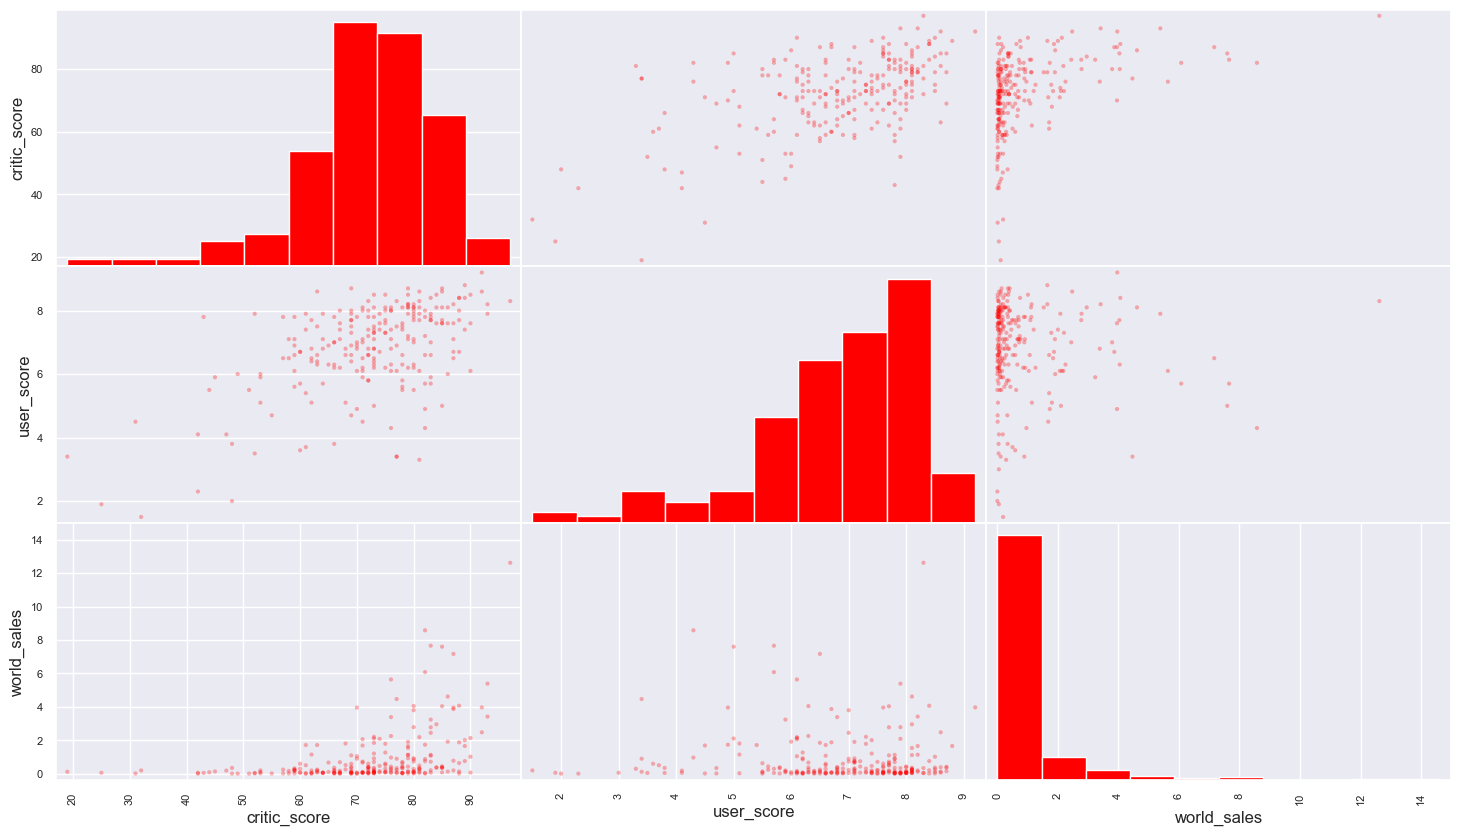

In [87]:
pd.plotting.scatter_matrix(games_actual_ps4, color='red', hist_kwds={'color':'red'}, figsize=(18,10), alpha=0.3)
plt.show()

In [88]:
corr = games_actual_ps4.corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,world_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
world_sales,0.402661,-0.040132,1.000000


Как видно из диаграмм рассеяния и матрицы корреляций, линейной зависимости между продажами и оценкой критиков и пользователей с продажами практически нет. Так же обратим внимание, что зависимость продаж от оценки критиков наблюдается с оценки в 60 баллов.

##### Соотнесем выводы с продажами игр на других платформах

Создадим датафрейм с продажами на остальных платформах за актуальный период и оставим в нем только нужные столбцы:

In [92]:
games_actual_other = games_actual.loc[games_actual['platform'] != 'PS4', ['critic_score', 'user_score', 'world_sales']]

Построим диаграмму рассеяния и матрицу корреляций:

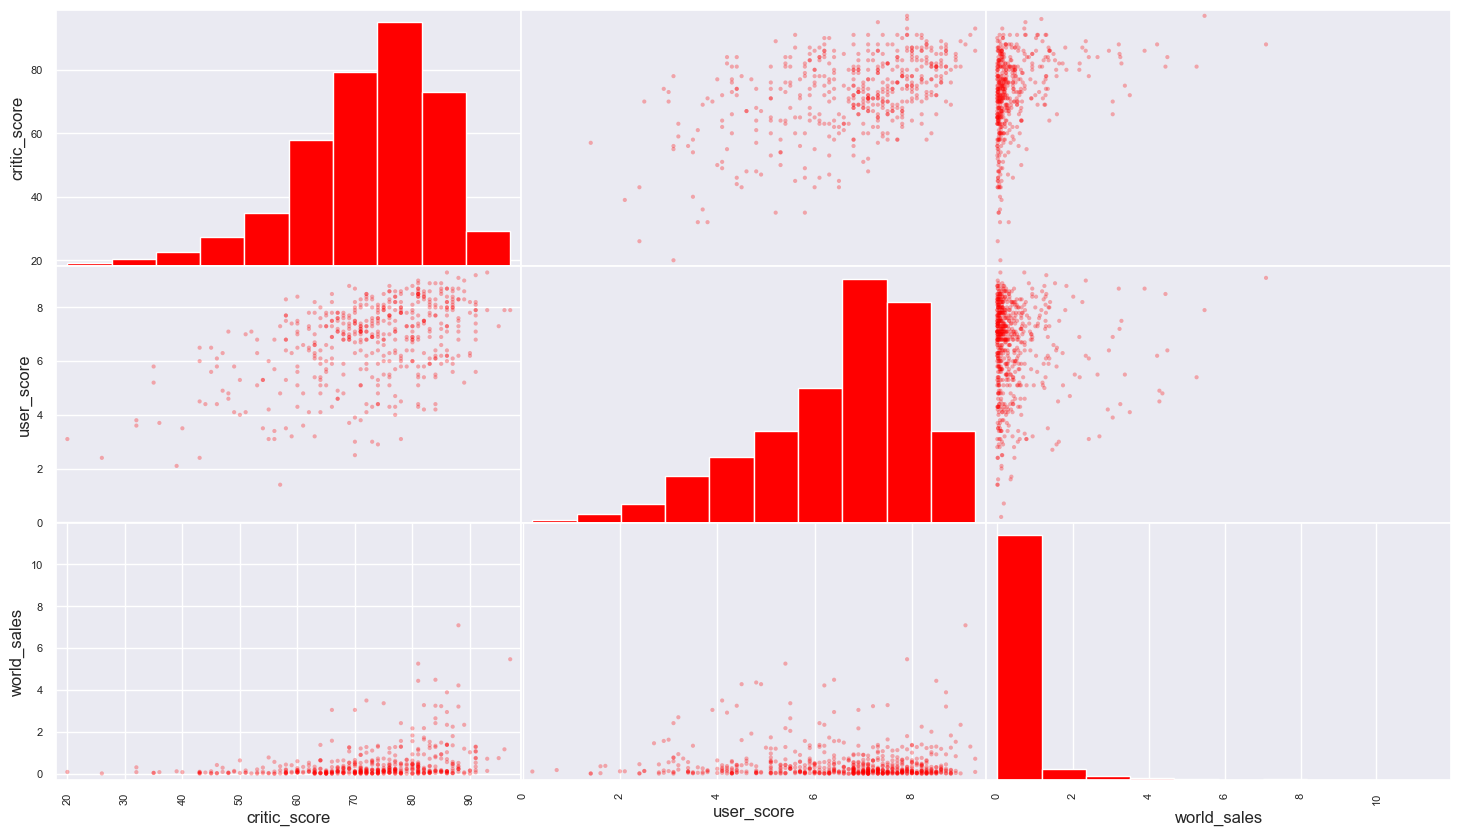

In [94]:
pd.plotting.scatter_matrix(games_actual_other, color='red', hist_kwds={'color':'red'}, figsize=(18,10), alpha=0.3)
plt.show()

In [95]:
corr = games_actual_other.corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,world_sales
critic_score,1.000000,0.485783,0.309474
user_score,0.485783,1.000000,-0.023478
world_sales,0.309474,-0.023478,1.000000


Наблюдается практически аналогичная с `PS4` зависимость с более низким уровнем продаж.

##### Посмотрим на общее распределение игр по жанрам

In [98]:
games_actual_genre = games_actual.pivot_table(index='genre', values='world_sales', aggfunc=['count', 'sum'])
games_actual_genre['sales_per_games'] = games_actual_genre['sum'] / games_actual_genre['count']
games_actual_genre.sort_values(by='sales_per_games', ascending=False, inplace=True)

In [99]:
games_actual_genre

,count,sum,sales_per_games
,world_sales,world_sales,
genre,,,
Shooter,128,170.94,1.335469
Sports,161,109.48,0.680000
Platform,38,18.09,0.476053
Fighting,60,28.22,0.470333
Role-Playing,221,101.44,0.459005
Racing,69,27.52,0.398841
Misc,113,37.55,0.332301
Action,619,199.36,0.322068


Больше всего игр выпускается в жанрах `Action` и `Role-Playing`. Самыми прибыльными же являются жанры `Shooter` и `Sports`.

**В данном пункте был произведен исследовательский анализ данных:**
- Пик выпуска игр пришелся на 2002-2011 годы, затем произошло двукратное снижение количества выпускаемых игр и стабилизация в диапазоне 550-600 игр в год. До 1994 года игры практически не выпускались (менее 100 игр в год)
- Самые активные продажи на платформу приходятся в первые 5 лет после выхода платформы
- Наиболее перспективными платформами являются `PS4` и `XOne`
- Подавляющее большинство игр продается в диапазоне до 1 млн. копий и присутствуют единичные выбросы с продажами больше 2 млн. копий
- Линейной зависимости между продажами и оценкой критиков и пользователей с продажами практически нет. Зависимость продаж от оценки критиков наблюдается с оценки в 60 баллов
- Больше всего игр выпускается в жанрах `Action` и `Role-Playing`. Самыми прибыльными же являются жанры `Shooter` и `Sports`.

#### Составим портрет пользователя каждого региона

##### Самые популярные платформы

Построим график распределения продаж по регионам в зависимости от платформы:

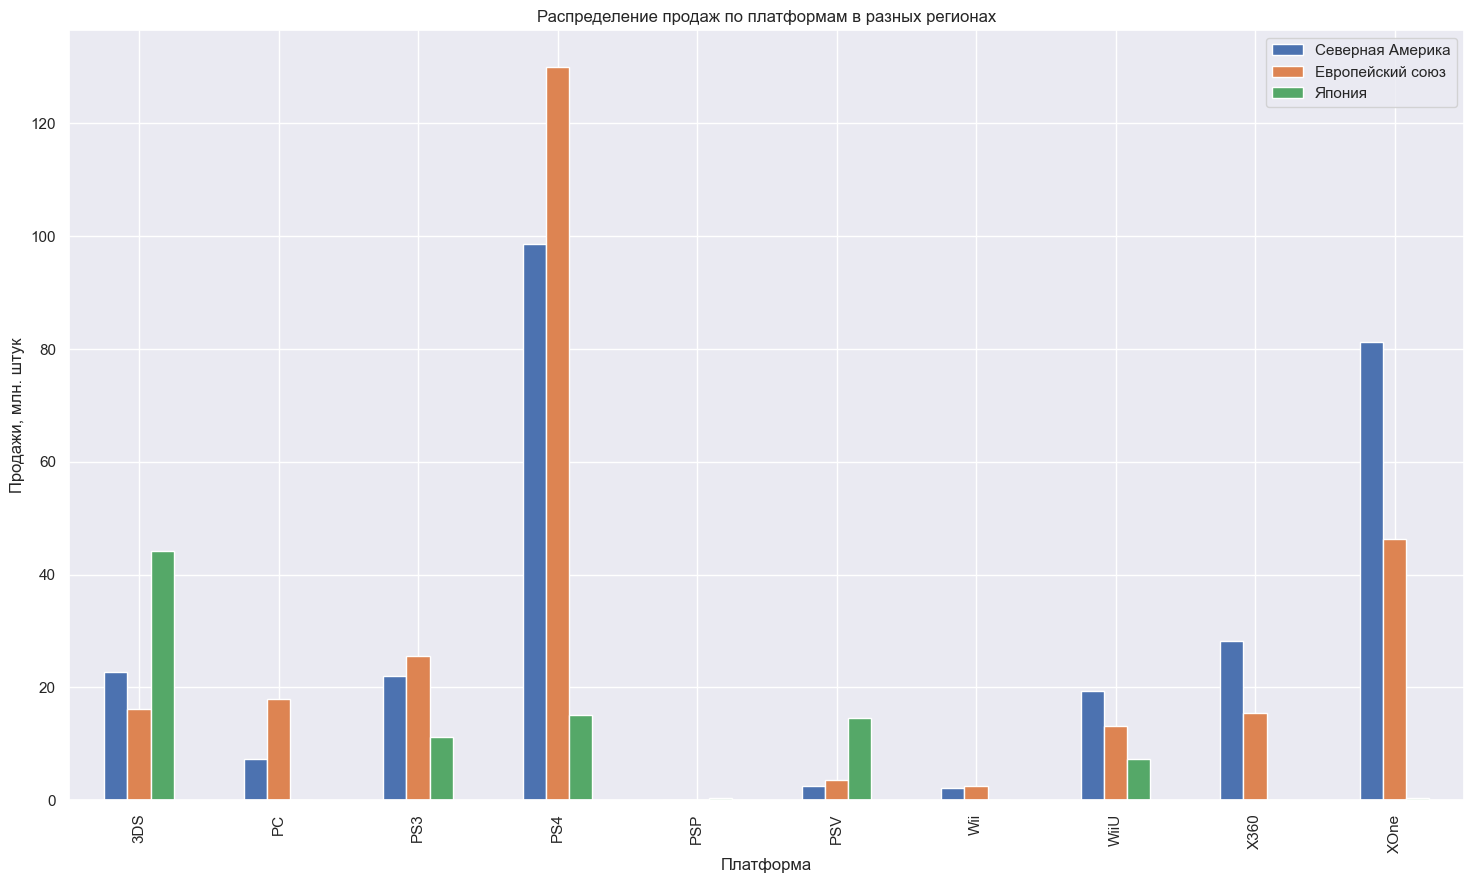

In [105]:
games_actual.groupby(by='platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', grid=True, figsize=(18, 10))
plt.title('Распределение продаж по платформам в разных регионах')
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. штук")
plt.legend(['Северная Америка', 'Европейский союз', 'Япония'])
plt.show()

In [106]:
games_actual.groupby(by='platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,22.64,16.12,44.24
PC,7.23,17.97,0.00
PS3,22.05,25.54,11.22
PS4,98.61,130.04,15.02
PSP,0.00,0.00,0.36
PSV,2.52,3.53,14.54
Wii,2.08,2.59,0.00
WiiU,19.36,13.15,7.31
X360,28.30,15.49,0.08


Распределение продаж игр на разных платформах по регионам несколько отличается. Ниже приведем ТОП-5 платформ для каждого региона слева направо по убыванию:
- Северная Америка: `PS4`, `XOne`, `X360`, `3DS`, `PS3`
- Европейский союз: `PS4`, `XOne`, `PS3`, `PC`, `3DS`
- Япония: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`

##### Самые популярные жанры

Построим график распределения продаж по регионам в зависимости от жанра:

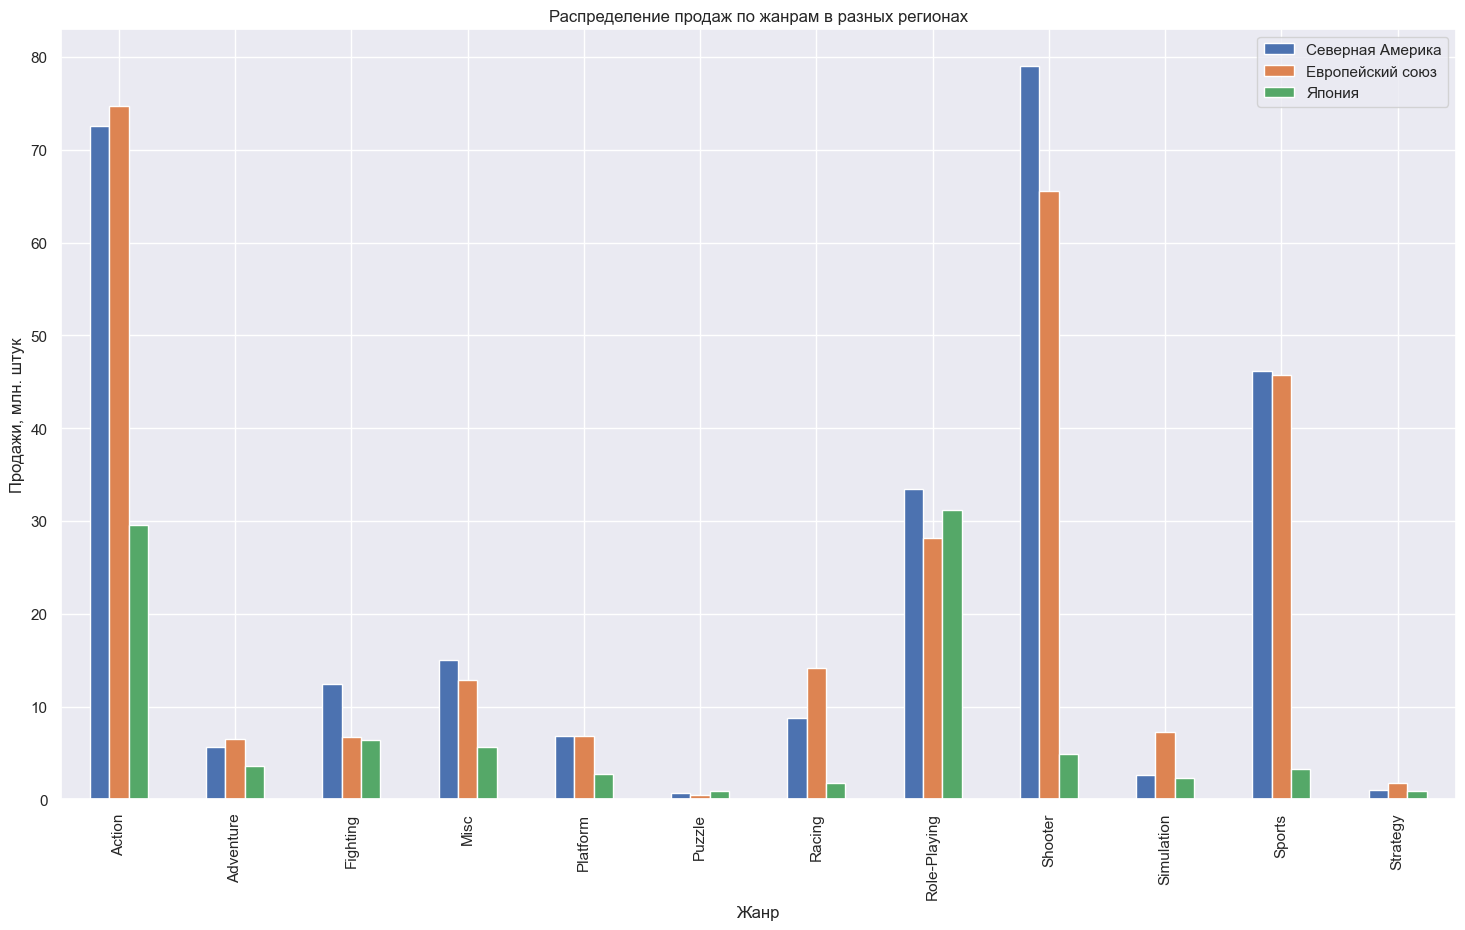

In [110]:
games_actual.groupby(by='genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', grid=True, figsize=(18, 10))
plt.title('Распределение продаж по жанрам в разных регионах')
plt.xlabel("Жанр")
plt.ylabel("Продажи, млн. штук")
plt.legend(['Северная Америка', 'Европейский союз', 'Япония'])
plt.show()

In [111]:
games_actual.groupby(by='genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


Распределение продаж игр в зависимости от жанра по регионам несколько отличается. Ниже приведем ТОП-5 платформ для каждого региона слева направо по убыванию:
- Северная Америка: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`
- Европейский союз: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
- Япония: `Role-Playing	`, `Action`, `Fighting`, `Misc`, `Shooter`

Как видно, в Америке и ЕС распределения похожи, в ТОП-5 первые два самых популярных жанра на разных местах, и на 5 месте в Америке жанр `Misc`, а в ЕС `Racing`. В Японии же распределение жанров по популярности кардинально отличается. Возможно, это можно объяснить разными национальными культурами в Европе\Америке и Японии и в следствии этого разными интересами у людей, населяющих эти регионы.

##### Влияние ли рейтинга ESRB на продажи в отдельном регионе

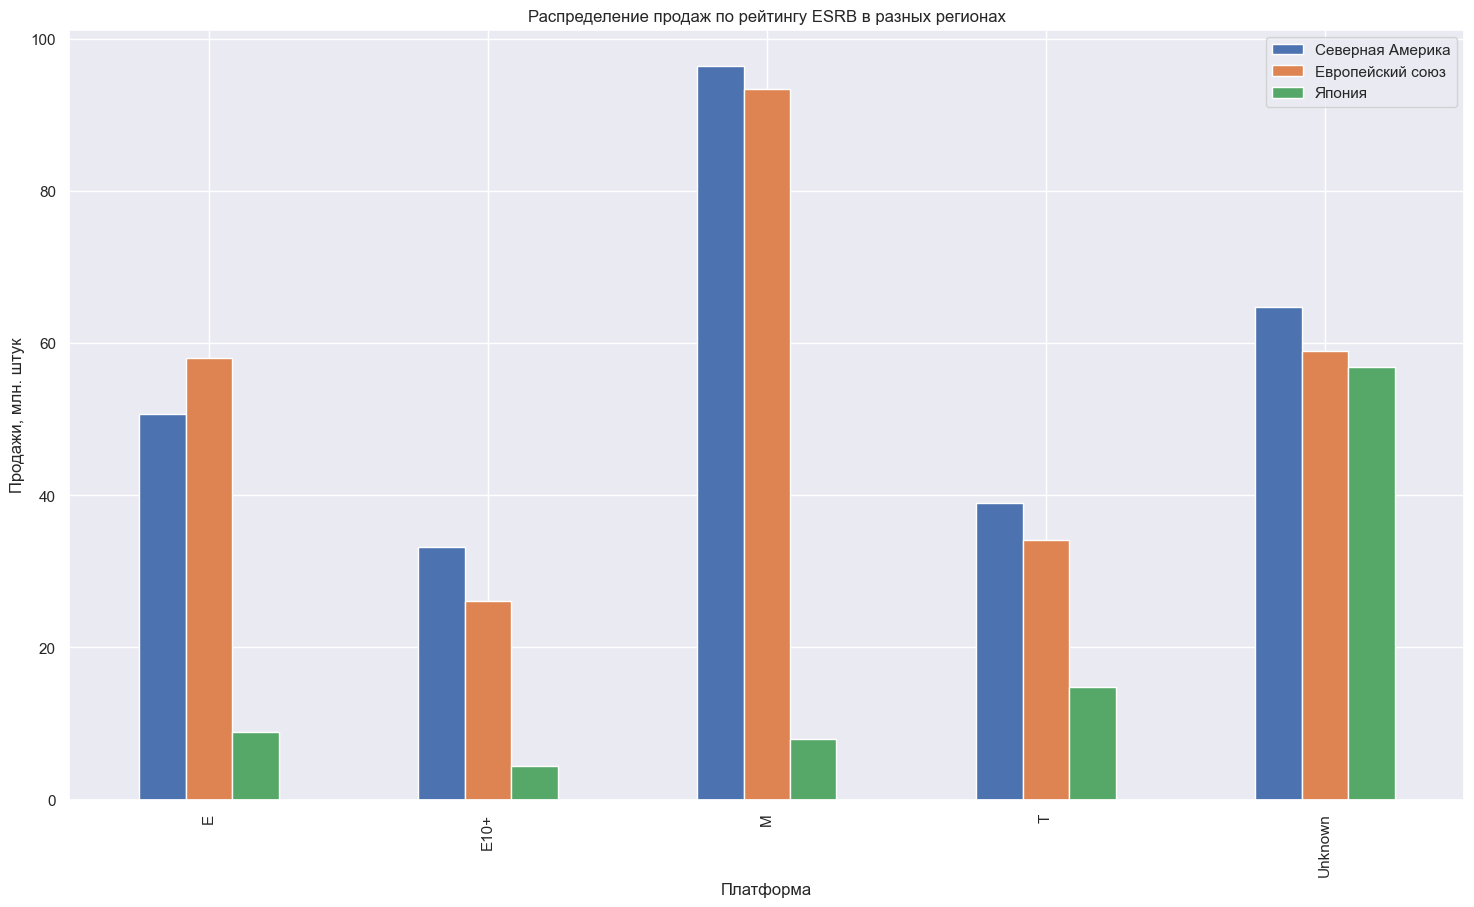

In [114]:
games_actual.groupby(by='rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind='bar', grid=True, figsize=(18, 10))
plt.title('Распределение продаж по рейтингу ESRB в разных регионах')
plt.xlabel("Платформа")
plt.ylabel("Продажи, млн. штук")
plt.legend(['Северная Америка', 'Европейский союз', 'Япония'])
plt.show()

In [115]:
games_actual.groupby(by='rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales')

,na_sales,eu_sales,jp_sales
rating,,,
E10+,33.23,26.16,4.46
T,38.95,34.07,14.78
E,50.74,58.06,8.94
Unknown,64.72,58.95,56.90
M,96.42,93.44,8.01


Распределение продаж по возрастным группам так же имеет отличия. В Европе и Северной Америке распределение абсолютно эдентично: на первом месте `M` (подходит для лиц старше 17 лет), на втором `Unknown`, на третьем месте `E` (подходит для всех возрастных категорий) далее `T` (подходит для лиц старше 13 лет) и `E10+` (подходит для лиц старше 10 лет). В Японии же на первом месте `Unknown`, за ним идут `T`, `E`, `M` и `E10+`. Мы видим, что `Unknown` в Японии занимает самую большую долю, возможно, потому что возрастную классификацию игр в Японии производит организация `CERO`.

**В данном пункте был составлен портрет пользователя каждого региона:**
- Распределение продаж игр на разных платформах по регионам несколько отличается. ТОП-5 платформ для каждого региона слева направо по убыванию:
 - Северная Америка: `PS4`, `XOne`, `X360`, `3DS`, `PS3`
 - Европейский союз: `PS4`, `XOne`, `PS3`, `PC`, `3DS`
 - Япония: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`
- Распределение продаж игр в зависимости от жанра по регионам несколько отличается. Ниже приведем ТОП-5 платформ для каждого региона слева направо по убыванию:
 - Северная Америка: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`
 - Европейский союз: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
 - Япония: `Role-Playing	`, `Action`, `Fighting`, `Misc`, `Shooter`
- Распределение продаж по возрастным группам так же имеет отличия. В Европе и Северной Америке распределение абсолютно эдентично: на первом месте `M` (подходит для лиц старше 17 лет), на втором `Unknown`, на третьем месте `E` (подходит для всех возрастных категорий) далее `T` (подходит для лиц старше 13 лет) и `E10+` (подходит для лиц старше 10 лет). В Японии же на первом месте `Unknown`, за ним идут `T`, `E`, `M` и `E10+`. Мы видим, что `Unknown` в Японии занимает самую большую долю, возможно, потому что возрастную классификацию игр в Японии производит организация `CERO`.

#### Проверка гипотез

##### Проверим гипотезу о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

Сформулируем нулевую и альтернативную гипотезы:
- Н0 - Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые
- Н1 - Средние пользовательские рейтинги платформ `Xbox One` и `PC` разные (двусторонняя).

Имеем две независимые выборки, поэтому проведем двухвыборочный t-тест для независимых выборок:

In [121]:
print('Среднее выборки платформы Xbox One:', games_actual.loc[games['platform'] == 'PC']['user_score'].dropna().mean().round(2))
print('Среднее выборки платформы PC:', games_actual.loc[games['platform'] == 'XOne']['user_score'].dropna().mean().round(2))
alpha = .05 #в задании не было задано, поэтому примем 0.05
results = st.ttest_ind(
    games_actual.loc[games['platform'] == 'PC']['user_score'].dropna(),
    games_actual.loc[games['platform'] == 'XOne']['user_score'].dropna())
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее выборки платформы Xbox One: 6.3
Среднее выборки платформы PC: 6.59
p-значение 0.10450507919348415
Не отвергаем нулевую гипотезу


Таким образом, мы не можем отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы:
- Н0 - Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые
- Н1 - Средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые разные (двусторонняя).

Имеем две независимые выборки, поэтому проведем двухвыборочный t-тест для независимых выборок:

In [125]:
print('Среднее выборки жанра Action:', games_actual.loc[games['genre'] == 'Action']['user_score'].dropna().mean().round(2))
print('Среднее выборки жанра Sports:', games_actual.loc[games['genre'] == 'Sports']['user_score'].dropna().mean().round(2))
alpha = .05 #в задании не было задано, поэтому примем 0.05
results = st.ttest_ind(
    games_actual.loc[games['genre'] == 'Action']['user_score'].dropna(),
    games_actual.loc[games['genre'] == 'Sports']['user_score'].dropna())
print('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее выборки жанра Action: 6.76
Среднее выборки жанра Sports: 5.23
p-значение 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Таким образом, мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу гипотезы о том, что средние рейтинги не равны.

#### Общий вывод

Целью проекта было выявление определяющих успешность игры закономерностей.

- В ходе предобработки были произведены следующие действия:
 - Переименованы столбцы
 - Преобразованы данные в правильные типы
 - По возможности удалены и заполнены пропущенные значения в столбцах `name`, `year_of_release`, `genre` и `rating`
 - Создан столбец `world_sales` с выручкой по всем регионам
 - Обработаны неявные дубликаты
- Далее был произведен исследовательский анализ данных и получены следующие выводы:
 - Пик выпуска игр пришелся на 2002-2011 годы, затем произошло двукратное снижение количества выпускаемых игр и стабилизация в диапазоне 550-600 игр в год. До 1994 года игры практически не выпускались (менее 100 игр в год)
 - Самые активные продажи на платформу приходятся в первые 5 лет после выхода платформы
 - Наиболее перспективными платформами являются `PS4` и `XOne`
 - Подавляющее большинство игр продается в диапазоне до 1 млн. копий и присутствуют единичные выбросы с продажами больше 2 млн. копий
 - Линейной зависимости между продажами и оценкой критиков и пользователей с продажами практически нет. Зависимость продаж от оценки критиков наблюдается с оценки в 60 баллов
 - Больше всего игр выпускается в жанрах `Action` и `Role-Playing`. Самыми прибыльными же являются жанры `Shooter` и `Sports`
- Затем был составлен портрет пользователя каждого региона:
 - Распределение продаж игр на разных платформах по регионам несколько отличается. ТОП-5 платформ для каждого региона слева направо по убыванию:
   - Северная Америка: `PS4`, `XOne`, `X360`, `3DS`, `PS3`
   - Европейский союз: `PS4`, `XOne`, `PS3`, `PC`, `3DS`
   - Япония: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`
 - Распределение продаж игр в зависимости от жанра по регионам несколько отличается. Ниже приведем ТОП-5 платформ для каждого региона слева направо по убыванию:
   - Северная Америка: `Shooter`, `Action`, `Sports`, `Role-Playing`, `Misc`
   - Европейский союз: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Racing`
   - Япония: `Role-Playing	`, `Action`, `Fighting`, `Misc`, `Shooter`
 - Распределение продаж по возрастным группам так же имеет отличия. В Европе и Северной Америке распределение абсолютно эдентично: на первом месте `M` (подходит для лиц старше 17 лет), на втором `Unknown`, на третьем месте `E` (подходит для всех возрастных категорий) далее `T` (подходит для лиц старше 13 лет) и `E10+` (подходит для лиц старше 10 лет). В Японии же на первом месте `Unknown`, за ним идут `T`, `E`, `M` и `E10+`. Мы видим, что `Unknown` в Японии занимает самую большую долю, возможно, потому что возрастную классификацию игр в Японии производит организация `CERO`
- Далее были проверены две гипотезы:
 - Не была отвергнута нулевая гипотеза о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые
 - Отвергнута нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports в пользу гипотезы о том, что средние рейтинги не равны.